In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sdata/sdata.csv',encoding='cp949')
df.head()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,202307,102,102. 망원역 1번출구 앞,일일권,NaN,20대,166,13506.22,121.1,522132.41,5076
1,202307,102,102. 망원역 1번출구 앞,일일권,NaN,30대,40,2888.06,24.84,107055.57,1407
2,202307,102,102. 망원역 1번출구 앞,일일권,NaN,40대,13,752.19,6.75,29146.67,252
3,202307,102,102. 망원역 1번출구 앞,일일권,NaN,50대,4,261.72,2.05,8850.00,80
4,202307,102,102. 망원역 1번출구 앞,일일권,NaN,~10대,5,461.54,4.02,17341.38,150


In [ ]:
df.tail()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6
624319,202312,6172,6172. 가양5단지아파트,정기권,M,기타,1,46.37,0.43,1858.74,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624320 entries, 0 to 624319
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여년월     624320 non-null  int64  
 1   대여소번호    624320 non-null  int64  
 2   대여소명     624320 non-null  object 
 3   대여구분코드   624320 non-null  object 
 4   성별       419875 non-null  object 
 5   연령대코드    624320 non-null  object 
 6   이용건수     624320 non-null  int64  
 7   운동량      624320 non-null  object 
 8   탄소량      624320 non-null  object 
 9   이용거리(M)  624320 non-null  float64
 10  이용시간(분)  624320 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 52.4+ MB


In [ ]:
df.describe()

,대여년월,대여소번호,이용건수,이용거리(M),이용시간(분)
count,624320.000000,624320.000000,624320.000000,6.243200e+05,624320.000000
mean,202309.446492,2305.921692,37.237172,8.668301e+04,765.792409
std,1.677989,1563.674311,71.060002,1.655482e+05,1425.595290
min,202307.000000,102.000000,1.000000,0.000000e+00,0.000000
25%,202308.000000,971.000000,4.000000,8.858710e+03,82.000000
50%,202309.000000,1994.000000,12.000000,3.099245e+04,278.000000
75%,202311.000000,3720.000000,39.000000,9.570575e+04,849.000000
max,202312.000000,6172.000000,2408.000000,1.042924e+07,90614.000000


In [ ]:
df_raw = df.copy()

In [ ]:
df.isnull().sum()

대여년월            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         204445
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이용거리(M)         0
이용시간(분)         0
dtype: int64

In [ ]:
df['성별'] = df['성별'].fillna('E')
df.isnull().sum()

대여년월       0
대여소번호      0
대여소명       0
대여구분코드     0
성별         0
연령대코드      0
이용건수       0
운동량        0
탄소량        0
이용거리(M)    0
이용시간(분)    0
dtype: int64

In [ ]:
df['성별'].unique()

array(['E', 'F', 'M', 'm', 'f'], dtype=object)

In [ ]:
df['성별'] = df['성별'].str.upper()
df['성별'].unique()

array(['E', 'F', 'M'], dtype=object)

In [ ]:
df['성별'].value_counts()

성별
M    221336
E    204445
F    198539
Name: count, dtype: int64

In [ ]:
221336-198539

22797

<Axes: xlabel='성별'>

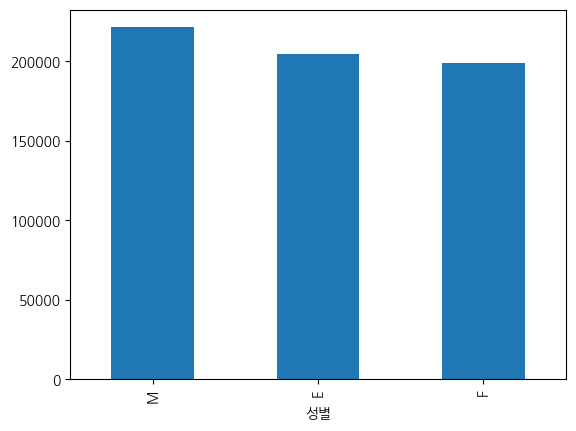

In [ ]:
df['성별'].value_counts().plot(kind='bar')

<Axes: xlabel='성별', ylabel='이용시간(분)'>

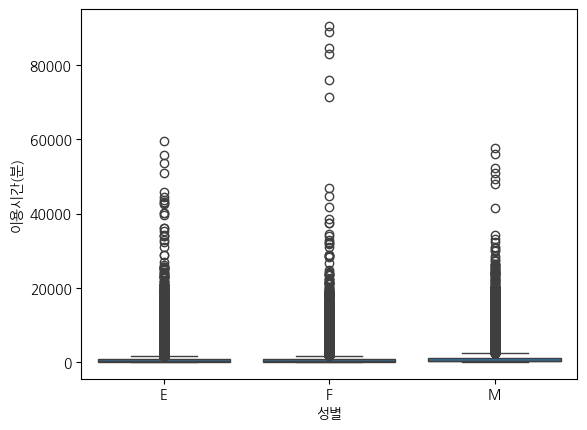

In [ ]:
sns.boxplot(x='성별',y='이용시간(분)',data=df)

<Axes: xlabel='이용시간(분)', ylabel='Count'>

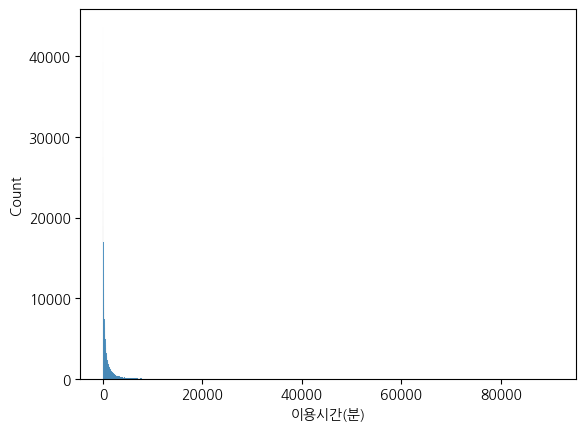

In [ ]:
sns.histplot(x=df['이용시간(분)'])

In [ ]:
q1 = df['이용시간(분)'].quantile(0.25)
q3 = df['이용시간(분)'].quantile(0.75)

print(q1,q3)

82.0 849.0


In [ ]:
iqr = q3-q1
iqr

767.0

In [ ]:
len(df)

624320

In [ ]:
outdata = df['이용시간(분)']> q3 + iqr*1.5
outdata = df[outdata].index
df = df.drop(outdata)
len(df)

561700

In [ ]:
outdata = df['이용시간(분)'] < q1 - iqr*1.5
outdata = df[outdata].index
print(len(outdata))
df = df.drop(outdata)
len(df)

0


561700

In [ ]:
624320-561700

62620

<Axes: xlabel='성별'>

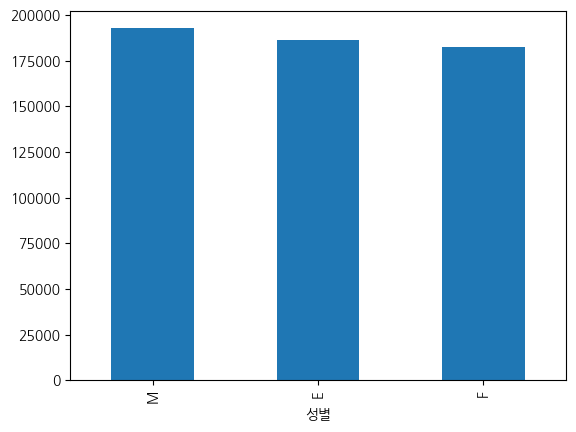

In [ ]:
df.value_counts('성별').plot(kind='bar')

In [ ]:
df_f = df[df['성별']=='F']
df_f

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
7,202307,102,102. 망원역 1번출구 앞,일일권,F,30대,51,3488.93,35.91,154818.53,1262
8,202307,102,102. 망원역 1번출구 앞,일일권,F,40대,15,1249.1,11.91,51358.94,451
9,202307,102,102. 망원역 1번출구 앞,일일권,F,50대,3,585.57,5.37,23150.29,125
10,202307,102,102. 망원역 1번출구 앞,일일권,F,70대이상,1,140.42,1.37,5910.00,37
11,202307,102,102. 망원역 1번출구 앞,일일권,F,~10대,19,2188.58,21.59,96433.07,921
...,...,...,...,...,...,...,...,...,...,...,...
624299,202312,6171,6171. 월드빌딩 앞,정기권,F,60대,1,84.03,0.97,4160.51,47
624300,202312,6171,6171. 월드빌딩 앞,정기권,F,~10대,13,409.99,4.26,18327.86,112
624301,202312,6171,6171. 월드빌딩 앞,정기권,F,기타,2,126.54,1.4,6067.76,69
624312,202312,6172,6172. 가양5단지아파트,정기권,F,20대,1,46.73,0.57,2458.39,18


In [ ]:
df_m = df[df['성별']=='M']
df_m

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
15,202307,102,102. 망원역 1번출구 앞,일일권,M,40대,25,2071.95,18.25,78590.92,670
16,202307,102,102. 망원역 1번출구 앞,일일권,M,50대,10,1054.85,8.76,37804.80,294
17,202307,102,102. 망원역 1번출구 앞,일일권,M,60대,4,342.92,3.12,13423.98,112
18,202307,102,102. 망원역 1번출구 앞,일일권,M,~10대,19,2201.53,19.33,86331.09,890
19,202307,102,102. 망원역 1번출구 앞,일일권,M,기타,16,910.57,8.19,35212.86,269
...,...,...,...,...,...,...,...,...,...,...,...
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6


In [ ]:
df_m['이용시간(분)'].mean()

471.7018566841147

In [ ]:
df_f['이용시간(분)'].mean()

392.898290799433

In [ ]:
471-392

79

In [ ]:
df

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
1,202307,102,102. 망원역 1번출구 앞,일일권,E,30대,40,2888.06,24.84,107055.57,1407
2,202307,102,102. 망원역 1번출구 앞,일일권,E,40대,13,752.19,6.75,29146.67,252
3,202307,102,102. 망원역 1번출구 앞,일일권,E,50대,4,261.72,2.05,8850.00,80
4,202307,102,102. 망원역 1번출구 앞,일일권,E,~10대,5,461.54,4.02,17341.38,150
5,202307,102,102. 망원역 1번출구 앞,일일권,E,기타,18,1879.38,17.06,73666.60,643
...,...,...,...,...,...,...,...,...,...,...,...
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6


In [ ]:
df_f['이용시간(분)']

7         1262
8          451
9          125
10          37
11         921
          ... 
624299      47
624300     112
624301      69
624312      18
624313     168
Name: 이용시간(분), Length: 182717, dtype: int64

In [ ]:
stats.ttest_ind(df_m['이용시간(분)'],df_f['이용시간(분)'],equal_var=True)

TtestResult(statistic=51.154797865590815, pvalue=0.0, df=375478.0)

In [ ]:
df.head()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
1,202307,102,102. 망원역 1번출구 앞,일일권,E,30대,40,2888.06,24.84,107055.57,1407
2,202307,102,102. 망원역 1번출구 앞,일일권,E,40대,13,752.19,6.75,29146.67,252
3,202307,102,102. 망원역 1번출구 앞,일일권,E,50대,4,261.72,2.05,8850.00,80
4,202307,102,102. 망원역 1번출구 앞,일일권,E,~10대,5,461.54,4.02,17341.38,150
5,202307,102,102. 망원역 1번출구 앞,일일권,E,기타,18,1879.38,17.06,73666.60,643


In [ ]:
df.tail()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
624315,202312,6172,6172. 가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,6172. 가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,6172. 가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,6172. 가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6
624319,202312,6172,6172. 가양5단지아파트,정기권,M,기타,1,46.37,0.43,1858.74,9


In [ ]:
len(df['대여소명'].unique())

2765

In [ ]:
'6172. 가양5단지아파트'.split('.')

['6172', ' 가양5단지아파트']

In [ ]:
d_name = df['대여소명']
name_list = []
for temp in d_name:
    if '.' in temp:
        name = temp.split('.')[-1].strip()
        name_list.append(name)

    else:
        name_list.append(temp.strip())

df['대여소명'] = name_list
df.tail()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
624315,202312,6172,가양5단지아파트,정기권,M,30대,3,142.02,0.98,4228.63,149
624316,202312,6172,가양5단지아파트,정기권,M,60대,1,5.18,0.05,201.33,36
624317,202312,6172,가양5단지아파트,정기권,M,70대이상,3,410.55,4.01,17279.13,183
624318,202312,6172,가양5단지아파트,정기권,M,~10대,1,40.55,0.3,1280.00,6
624319,202312,6172,가양5단지아파트,정기권,M,기타,1,46.37,0.43,1858.74,9


In [ ]:
len(df)

561700

In [ ]:
df_d = df.pivot_table(df,index='대여소명',aggfunc='sum')
df_d

,대여구분코드,대여년월,대여소번호,성별,연령대코드,운동량,이용거리(M),이용건수,이용시간(분),탄소량
대여소명,,,,,,,,,,
(시립)고덕평생학습관,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,48554284,256800,EEEEFFFFFMMMMMMEEEEEEEEFFFFFFFFMMMMMMMEEEEEEFF...,20대30대40대기타20대30대40대~10대기타20대30대40대60대~10대기타기타...,366.38106.7235.8327.65282.98192.97207.39464.63...,7648747.15,4002,83684,3.321.010.270.252.471.751.995.142.044.562.983....
(재)FITI시험연구원,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권(...,38034188,512112,EEEEFFFFMMMMMMEEEEEEEFFFFFMMMMMMMEEEEFFFFFMMMM...,20대30대40대기타20대30대40대기타20대30대40대50대~10대기타기타20대4...,768.161517.69172.8156.212100.62543.56141.91132...,9190032.67,5464,75157,7.7613.171.471.4119.945.611.321.4126.1428.11.8...
19민주묘지역,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,44912706,341658,EEEEEFFFFFFMMMMMMEEEEEEFFFFFFFFMMMMMMEEEEEFFFF...,20대30대40대~10대기타20대30대40대70대이상~10대기타20대30대40대50...,3004.27682.1983.88129.22612.841255.28959.65487...,10236484.92,3914,94100,27.499.060.721.45.8612.058.934.451.737.27.756....
19민주묘지역 1번출구,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,45721947,353464,EEEEEFFFFFFFMMMMMMMEEEEEEEFFFFFFFMMMMMMMEEEEEE...,20대30대40대~10대기타20대30대40대50대70대이상~10대기타20대30대40...,3577.21264.61312.22997.31555.853330.221209.471...,11987737.38,4597,105348,34.572.513.439.566.731.8611.691.290.691.082.65...
19탑 앞,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,44508069,341220,EEEEFFFFFFFMMMMMEEEEEEEEFFFFFFFMMMMMMMEEEEFFFF...,20대30대40대기타20대30대40대50대60대~10대기타20대30대40대~10대기...,680.88237.0932.69196.15318.641176.82103.2523.2...,7421131.66,3140,62642,6.052.520.291.922.8310.250.990.290.110.220.58....
...,...,...,...,...,...,...,...,...,...,...
희성오피앙,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,48149667,390082,EEEEEEEFFFFFFFMMMMMMMEEEEEEEFFFFFFFMMMMMMEEEEE...,20대30대40대50대60대~10대기타20대30대40대50대60대~10대기타20대3...,4435.192002.43479.56140.28140.35563.45130.2920...,14691951.06,6145,120994,40.4117.464.491.260.885.431.2719.4411.341.574....
희훈타워빌 앞,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,42080369,812240,EEEEEEFFFFFFFMMMMMMMEEEEEFFFFFFMMMMMEEEEEEFFFF...,20대30대40대60대~10대기타20대30대40대50대60대~10대기타20대30대4...,2644.331026.98252.7493.9651.47362.891348.36132...,10863245.81,5572,96473,25.348.411.90.970.423.6913.4114.080.930.211.56...
힐스테이트에코,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,42485001,571200,EEEEEEFFFFFFMMMMMMEEEEEEFFFFFFMMMMEEEEEFFFFFMM...,20대30대40대50대~10대기타20대30대40대50대~10대기타20대30대40대5...,3803.811721.72282.85614.536.1396.581994.071385...,11261777.89,7306,101298,36.5115.72.434.950.363.7719.3513.611.950.155.9...


In [ ]:
df_d.head()

,대여구분코드,대여년월,대여소번호,성별,연령대코드,운동량,이용거리(M),이용건수,이용시간(분),탄소량
대여소명,,,,,,,,,,
(시립)고덕평생학습관,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,48554284,256800,EEEEFFFFFMMMMMMEEEEEEEEFFFFFFFFMMMMMMMEEEEEEFF...,20대30대40대기타20대30대40대~10대기타20대30대40대60대~10대기타기타...,366.38106.7235.8327.65282.98192.97207.39464.63...,7648747.15,4002,83684,3.321.010.270.252.471.751.995.142.044.562.983....
(재)FITI시험연구원,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권(...,38034188,512112,EEEEFFFFMMMMMMEEEEEEEFFFFFMMMMMMMEEEEFFFFFMMMM...,20대30대40대기타20대30대40대기타20대30대40대50대~10대기타기타20대4...,768.161517.69172.8156.212100.62543.56141.91132...,9190032.67,5464,75157,7.7613.171.471.4119.945.611.321.4126.1428.11.8...
19민주묘지역,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,44912706,341658,EEEEEFFFFFFMMMMMMEEEEEEFFFFFFFFMMMMMMEEEEEFFFF...,20대30대40대~10대기타20대30대40대70대이상~10대기타20대30대40대50...,3004.27682.1983.88129.22612.841255.28959.65487...,10236484.92,3914,94100,27.499.060.721.45.8612.058.934.451.737.27.756....
19민주묘지역 1번출구,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,45721947,353464,EEEEEFFFFFFFMMMMMMMEEEEEEEFFFFFFFMMMMMMMEEEEEE...,20대30대40대~10대기타20대30대40대50대70대이상~10대기타20대30대40...,3577.21264.61312.22997.31555.853330.221209.471...,11987737.38,4597,105348,34.572.513.439.566.731.8611.691.290.691.082.65...
19탑 앞,일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일일권일...,44508069,341220,EEEEFFFFFFFMMMMMEEEEEEEEFFFFFFFMMMMMMMEEEEFFFF...,20대30대40대기타20대30대40대50대60대~10대기타20대30대40대~10대기...,680.88237.0932.69196.15318.641176.82103.2523.2...,7421131.66,3140,62642,6.052.520.291.922.8310.250.990.290.110.220.58....


In [ ]:
df.columns

Index(['대여년월', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이용거리(M)', '이용시간(분)'],
      dtype='object')

In [ ]:
df.head()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
1,202307,102,망원역 1번출구 앞,일일권,E,30대,40,2888.06,24.84,107055.57,1407
2,202307,102,망원역 1번출구 앞,일일권,E,40대,13,752.19,6.75,29146.67,252
3,202307,102,망원역 1번출구 앞,일일권,E,50대,4,261.72,2.05,8850.00,80
4,202307,102,망원역 1번출구 앞,일일권,E,~10대,5,461.54,4.02,17341.38,150
5,202307,102,망원역 1번출구 앞,일일권,E,기타,18,1879.38,17.06,73666.60,643


In [ ]:
df_d = df_d[['대여소번호','이용거리(M)','이용건수','이용시간(분)']]
df_d

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,256800,7648747.15,4002,83684
(재)FITI시험연구원,512112,9190032.67,5464,75157
19민주묘지역,341658,10236484.92,3914,94100
19민주묘지역 1번출구,353464,11987737.38,4597,105348
19탑 앞,341220,7421131.66,3140,62642
...,...,...,...,...
희성오피앙,390082,14691951.06,6145,120994
희훈타워빌 앞,812240,10863245.81,5572,96473
힐스테이트에코,571200,11261777.89,7306,101298


In [ ]:
da_no = []

for temp in df_d.index:
    da_no.append(df[df['대여소명']==temp]['대여소번호'].iloc[0])

df_d['대여소번호'] = da_no

df_d.sort_values(by='이용건수',ascending=False)

<ipython-input-43-3ed51d2eca34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['대여소번호'] = da_no


,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
마곡역1번출구,1151,11138020.00,12750,108560
공항초등학교건너편,1162,13383374.52,12088,117566
서울남부출입국관리소,3758,12446203.84,11950,115344
마곡수명산파크 209동 건너편,1192,13806577.55,11717,124075
마곡 MICE 복합단지,5062,12932641.80,11361,110306
...,...,...,...,...
신내역금강펜테리움센트럴파크,4845,143996.98,71,964
구립수락노인종합복지관,5330,105299.67,64,1166
서울숲 IT캐슬,3538,140491.77,61,1252


In [ ]:
df_d.to_csv('서울시 대여소별 현황.csv')

In [ ]:
df_d.sort_values(by='이용시간(분)',ascending=False)[0:10]

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
한양수자인아파트 앞,1828,19147905.85,9081,158108
광남중학교,544,21589656.63,5097,155051
화랑대역 7번출구,1450,20152039.88,6677,151702
위례중앙푸르지오 201동 앞,4453,16285162.91,6698,149540
신목동역 3번출구,766,20987919.63,4960,149344
도봉제1교,4077,23352134.87,4055,145366
구파발역 2번출구,905,16102506.55,7627,144310
현대자동차서비스 앞,836,20337608.66,3683,144132
문화촌 공원,123,20864716.00,4616,143779


In [ ]:
df.to_csv('서울시 따릉이 전처리.csv')

In [ ]:
df.head()

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
1,202307,102,망원역 1번출구 앞,일일권,E,30대,40,2888.06,24.84,107055.57,1407
2,202307,102,망원역 1번출구 앞,일일권,E,40대,13,752.19,6.75,29146.67,252
3,202307,102,망원역 1번출구 앞,일일권,E,50대,4,261.72,2.05,8850.00,80
4,202307,102,망원역 1번출구 앞,일일권,E,~10대,5,461.54,4.02,17341.38,150
5,202307,102,망원역 1번출구 앞,일일권,E,기타,18,1879.38,17.06,73666.60,643


In [ ]:
df_d.head()

,대여소번호,이용거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,1070,7648747.15,4002,83684
(재)FITI시험연구원,2724,9190032.67,5464,75157
19민주묘지역,1539,10236484.92,3914,94100
19민주묘지역 1번출구,1564,11987737.38,4597,105348
19탑 앞,1551,7421131.66,3140,62642


In [ ]:
 station_info = pd.read_csv('공공자전거 대여소 정보(23.06월 기준).csv',encoding='cp949')
 station_info.tail()
 station_info = station_info.iloc[4:,0:6]
 station_info.columns = ['번호','이름','소재지','주소','위도','경도']
 station_info.head()

,번호,이름,소재지,주소,위도,경도
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.9714508
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.57594681,126.9740601
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.57176971,126.9746628
7,305.0,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.57255936,126.9783325
8,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.56999969,126.9710999


In [ ]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 4 to 2752
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      2749 non-null   float64
 1   이름      2749 non-null   object 
 2   소재지     2749 non-null   object 
 3   주소      2749 non-null   object 
 4   위도      2749 non-null   object 
 5   경도      2749 non-null   object 
dtypes: float64(1), object(5)
memory usage: 129.0+ KB


In [ ]:
station_info['번호'] = station_info['번호'].astype('int')
station_info['위도'] = station_info['위도'].astype('float')
station_info['경도'] = station_info['경도'].astype('float')
station_info.head()

,번호,이름,소재지,주소,위도,경도
4,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
5,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
6,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
7,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
8,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100


In [ ]:
station_info.isnull().sum()

번호     0
이름     0
소재지    0
주소     0
위도     0
경도     0
dtype: int64

In [ ]:
d = station_info[station_info['번호']==316]
d['위도'].values[0]

37.57039642

In [ ]:
lat = []
lng = []

for temp in df_d['대여소번호']:
    try:
        d = station_info[station_info['번호']==temp]
        lat.append(d['위도'].values[0])
        lng.append(d['경도'].values[0])
    except:
        lat.append(39.1)
        lng.append(128.1)

In [ ]:
df_d['위도'] = lat
df_d['경도'] = lng
df_d

<ipython-input-70-f3e4b87fceee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['위도'] = lat
<ipython-input-70-f3e4b87fceee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['경도'] = lng


,대여소번호,이용거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
(시립)고덕평생학습관,1070,7648747.15,4002,83684,37.555702,127.157921
(재)FITI시험연구원,2724,9190032.67,5464,75157,37.568485,126.838570
19민주묘지역,1539,10236484.92,3914,94100,37.649673,127.013451
19민주묘지역 1번출구,1564,11987737.38,4597,105348,37.649597,127.013847
19탑 앞,1551,7421131.66,3140,62642,37.646862,127.008812
...,...,...,...,...,...,...
희성오피앙,1639,14691951.06,6145,120994,37.680313,127.055069
희훈타워빌 앞,3905,10863245.81,5572,96473,37.501915,126.889244
힐스테이트에코,2720,11261777.89,7306,101298,37.559658,126.829605


In [ ]:
df_top_use = df_d.sort_values(by='이용건수',ascending=False)[0:10]
df_top_use

,대여소번호,이용거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
마곡역1번출구,1151,11138020.00,12750,108560,37.560207,126.824142
공항초등학교건너편,1162,13383374.52,12088,117566,37.562679,126.820473
서울남부출입국관리소,3758,12446203.84,11950,115344,37.560593,126.820847
마곡수명산파크 209동 건너편,1192,13806577.55,11717,124075,37.555450,126.826897
마곡 MICE 복합단지,5062,12932641.80,11361,110306,37.563541,126.824554
마곡수명산 1-2단지,2732,13146278.97,10944,118156,37.555309,126.829857
강서세무서 앞,2744,11615140.34,10914,104086,37.562092,126.820969
마곡수명산파크1단지,2718,12878318.95,10666,120179,37.555191,126.831467
마곡엠밸리10단지 앞,1168,13214454.91,10292,114383,37.560291,126.818756


In [ ]:
import folium

map = folium.Map(location=[37.566183,126.978442],zoom_start=12)

for temp in range(len(df_top_use)):
    d_temp = df_top_use.iloc[temp]
    folium.Marker(location=[d_temp['위도'],d_temp['경도']],icon=folium.Icon(color='red'),popup=d_temp.name).add_to(map)

map


In [ ]:
df_ma_top = df[df['대여소명']=='마곡역1번출구']
df_ma_top

,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
31394,202307,1151,마곡역1번출구,일일권,E,20대,33,707.61,6.62,30016.46,262
31395,202307,1151,마곡역1번출구,일일권,E,30대,20,386.66,3.26,14187.20,181
31396,202307,1151,마곡역1번출구,일일권,E,40대,5,110.28,0.92,3958.74,37
31397,202307,1151,마곡역1번출구,일일권,E,50대,4,59.02,0.61,2650.42,23
31398,202307,1151,마곡역1번출구,일일권,E,60대,1,29.62,0.26,1100.00,8
...,...,...,...,...,...,...,...,...,...,...,...
559022,202312,1151,마곡역1번출구,정기권,M,50대,229,5812.77,48,207768.70,1591
559023,202312,1151,마곡역1번출구,정기권,M,60대,84,2280.03,20.12,87765.84,767
559024,202312,1151,마곡역1번출구,정기권,M,70대이상,1,28.93,0.26,1123.80,7
559025,202312,1151,마곡역1번출구,정기권,M,~10대,128,2527.77,23.26,100096.48,883


In [ ]:
df_ma_top['연령대코드'].unique()

array(['20대', '30대', '40대', '50대', '60대', '~10대', '기타', '70대이상'],
      dtype=object)

In [ ]:
df_ma_mean = pd.pivot_table(df_ma_top,index='연령대코드',values=['이용시간(분)','이용건수'],aggfunc='mean')
df_ma_mean.sort_values('이용건수',ascending=False)

,이용건수,이용시간(분)
연령대코드,,
20대,95.703704,737.481481
30대,80.555556,656.000000
40대,69.714286,552.321429
50대,64.750000,621.321429
기타,47.190476,423.380952
~10대,46.742857,393.857143
60대,20.230769,224.500000
70대이상,5.125000,41.875000


In [ ]:
df_top_use = df_d.sort_values(by='이용시간(분)',ascending=False)[0:20]
df_top_use

,대여소번호,이용거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
한양수자인아파트 앞,1828,19147905.85,9081,158108,37.475319,126.898888
광남중학교,544,21589656.63,5097,155051,37.540730,127.102905
화랑대역 7번출구,1450,20152039.88,6677,151702,37.619637,127.085045
위례중앙푸르지오 201동 앞,4453,16285162.91,6698,149540,37.474346,127.143265
신목동역 3번출구,766,20987919.63,4960,149344,37.543949,126.883461
도봉제1교,4077,23352134.87,4055,145366,37.679848,127.050385
구파발역 2번출구,905,16102506.55,7627,144310,37.636234,126.918999
현대자동차서비스 앞,836,20337608.66,3683,144132,37.531422,126.951500
문화촌 공원,123,20864716.00,4616,143779,37.594330,126.947388


In [ ]:
import folium

map = folium.Map(location=[37.566183,126.978442],zoom_start=12)

for temp in range(len(df_top_use)):
    d_temp = df_top_use.iloc[temp]
    folium.Marker(location=[d_temp['위도'],d_temp['경도']],icon=folium.Icon(color='red'),popup=d_temp.name).add_to(map)

map
